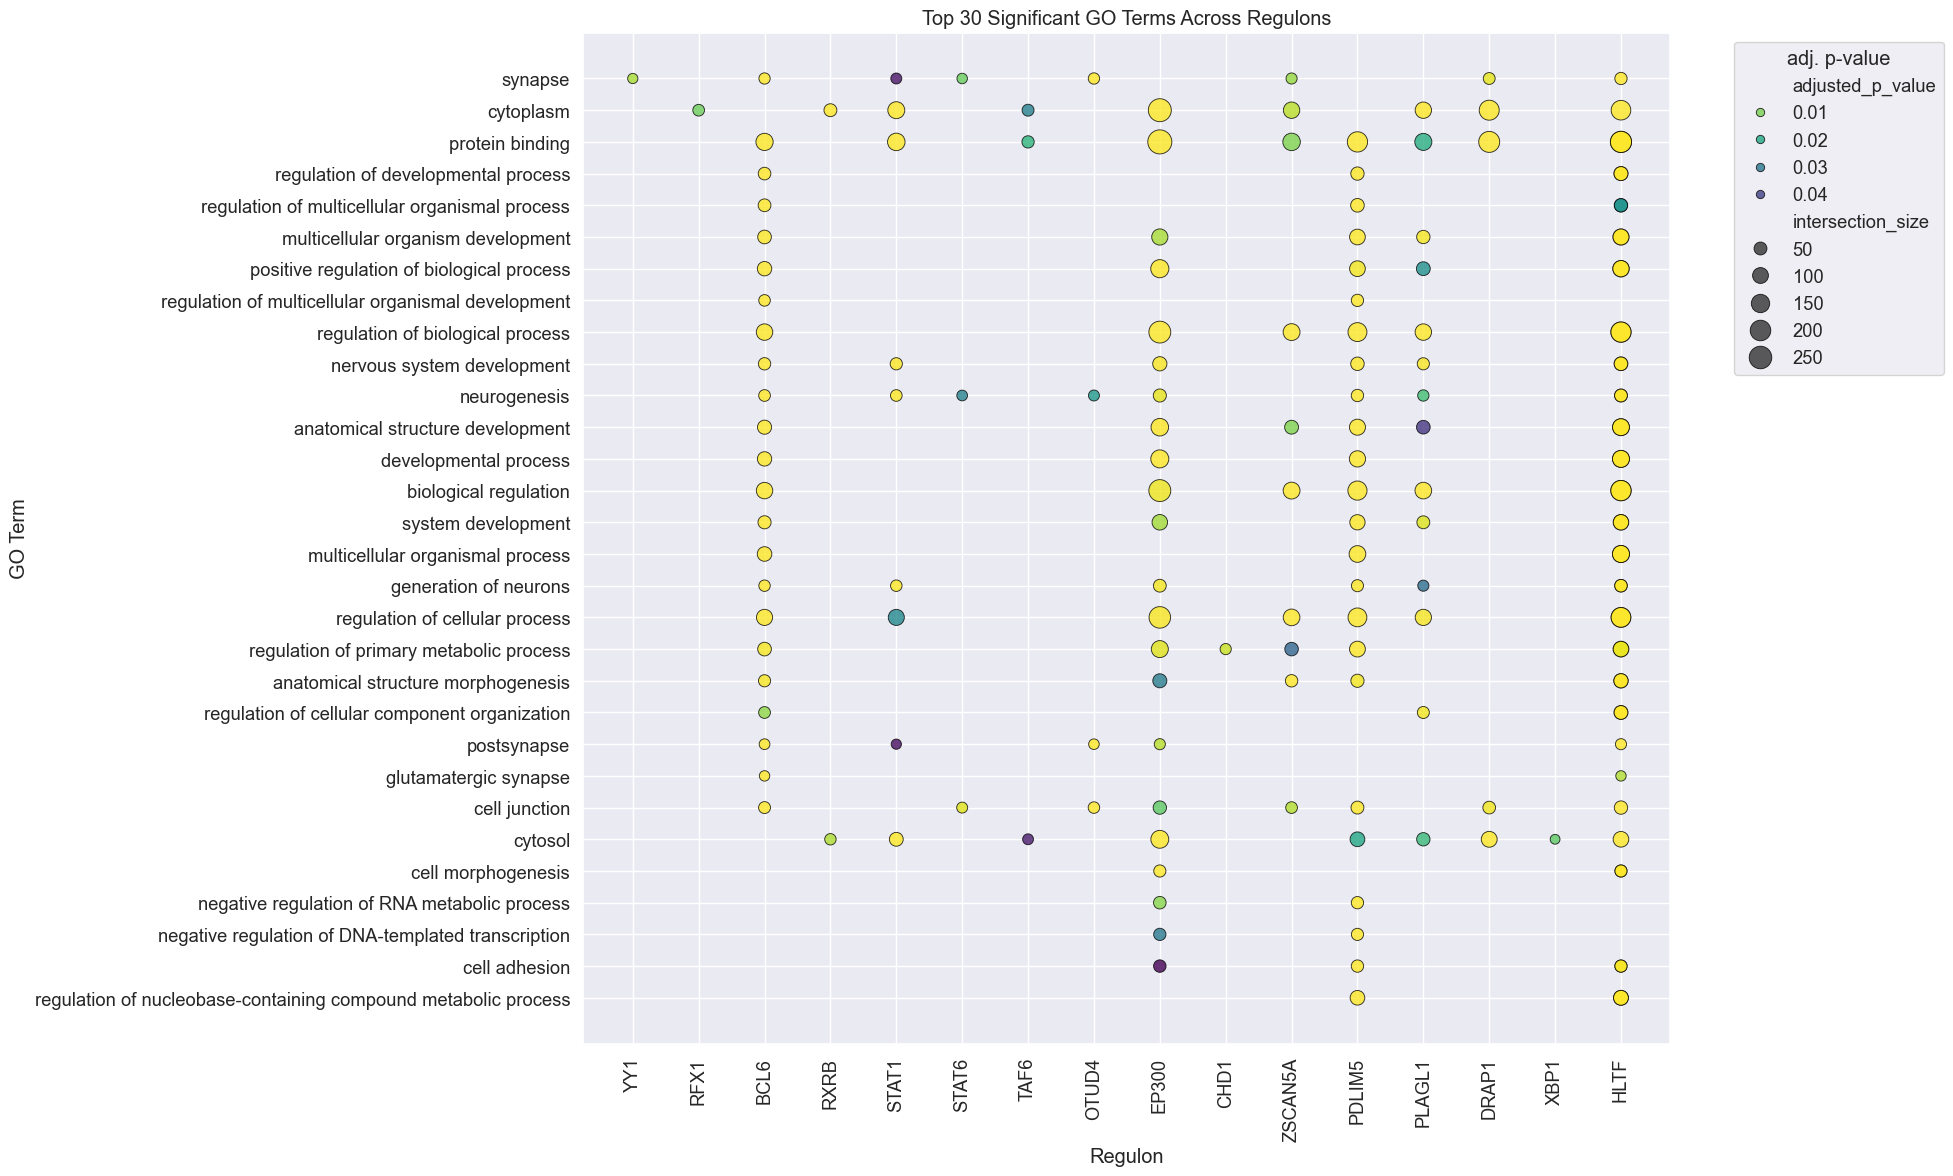

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Directory containing g:Profiler result files
input_dir = "/Users/jakobmaeots/Internship/Data/g-profiler/NEN_I"
csv_files = glob.glob(os.path.join(input_dir, "*.csv"))

# Collect data
all_data = []
for file_path in csv_files:
    try:
        df = pd.read_csv(file_path)
        regulon = os.path.splitext(os.path.basename(file_path))[0]
        df_subset = df[['term_name', 'source', 'adjusted_p_value', 'intersection_size']].copy()
        df_subset['regulon'] = regulon
        all_data.append(df_subset)
    except Exception as e:
        print(f"Skipping {file_path}: {e}")

# Combine into single dataframe
df_combined = pd.concat(all_data, ignore_index=True)

# Filter to only official GO terms
df_go = df_combined[df_combined['source'].isin(['GO:MF', 'GO:BP', 'GO:CC'])]

# Get top 30 unique GO terms by significance
top_terms = (
    df_go.sort_values("adjusted_p_value")
         .drop_duplicates("term_name")
         .head(30)["term_name"]
)

# Filter to keep only those top 30 terms
df_filtered = df_go[df_go["term_name"].isin(top_terms)]

# Plot
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.2)
sns.scatterplot(
    data=df_filtered,
    x="regulon",
    y="term_name",
    size="intersection_size",
    hue="adjusted_p_value",
    palette="viridis_r",
    sizes=(50, 300),
    edgecolor='black',
    alpha=0.8
)

plt.xticks(rotation=90)
plt.xlabel("Regulon")
plt.ylabel("GO Term")
plt.title("Top 30 Significant GO Terms Across Regulons")
plt.legend(title="adj. p-value", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_Top30_GOterms.png", dpi=300, bbox_inches="tight")
plt.show()

In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Directory containing g:Profiler result files
input_dir = "/Users/jakobmaeots/Internship/Data/g-profiler/NEN_I"
csv_files = glob.glob(os.path.join(input_dir, "*.csv"))

# Collect data
all_data = []
for file_path in csv_files:
    try:
        df = pd.read_csv(file_path)
        regulon = os.path.splitext(os.path.basename(file_path))[0]
        df_subset = df[['term_name', 'source', 'adjusted_p_value', 'intersection_size']].copy()
        df_subset['regulon'] = regulon
        all_data.append(df_subset)
    except Exception as e:
        print(f"Skipping {file_path}: {e}")

# Combine into one dataframe and relabel GO categories
df_combined = pd.concat(all_data, ignore_index=True)
df_go = df_combined[df_combined['source'].isin(['GO:MF', 'GO:BP', 'GO:CC'])].copy()
df_go['source'] = df_go['source'].replace({
    'GO:BP': 'Biological Process',
    'GO:MF': 'Molecular Function',
    'GO:CC': 'Cellular Component'
})

# Step 1: Get top 30 unique GO terms per category (by p-value)
top_go_terms_per_cat = (
    df_go.sort_values("adjusted_p_value")
         .drop_duplicates(subset=["term_name", "source"])
         .groupby("source")["term_name"]
         .apply(lambda x: x.head(30))
         .explode()
         .reset_index(drop=True)
)

# Step 2: Keep all rows that match those top terms (regardless of regulon)
df_filtered = df_go[df_go["term_name"].isin(top_go_terms_per_cat)]

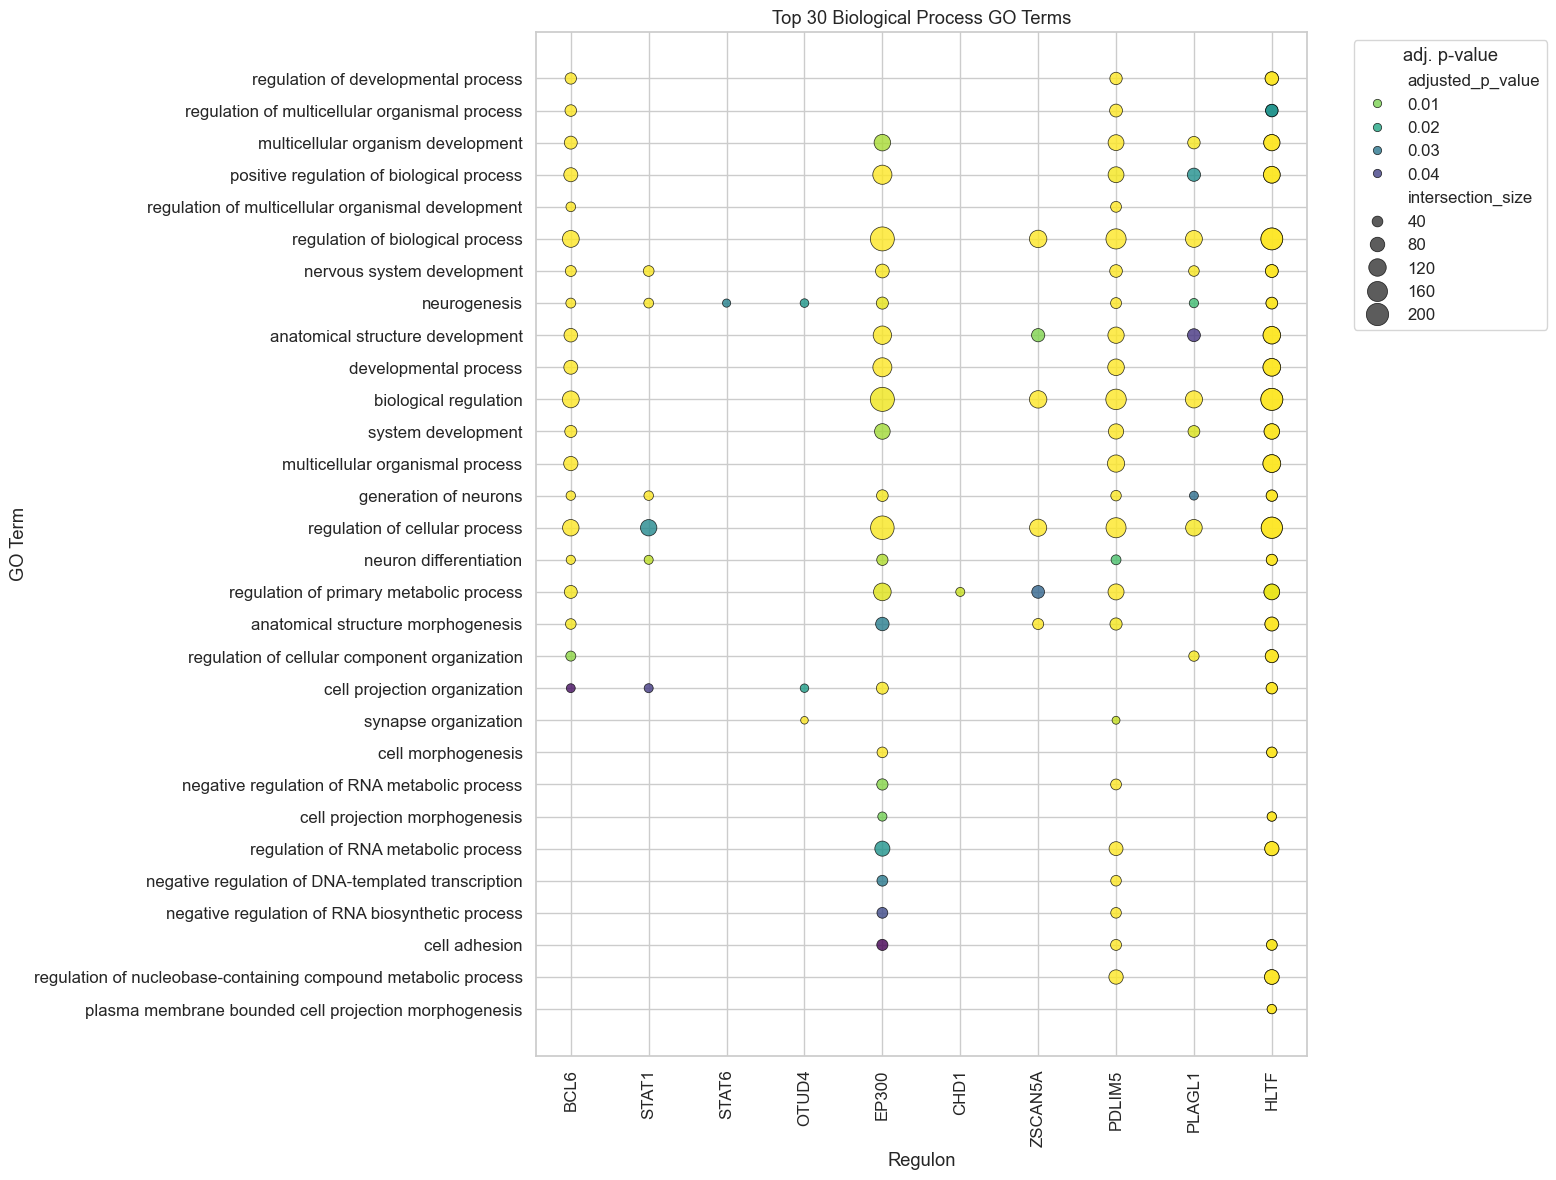

In [3]:
sns.set(style="whitegrid", font_scale=1.1)
df_bp = df_filtered[df_filtered['source'] == 'Biological Process']

plt.figure(figsize=(16, max(6, 0.4 * df_bp['term_name'].nunique())))
sns.scatterplot(
    data=df_bp,
    x="regulon",
    y="term_name",
    size="intersection_size",
    hue="adjusted_p_value",
    palette="viridis_r",
    sizes=(30, 300),
    edgecolor='black',
    alpha=0.8
)
plt.title("Top 30 Biological Process GO Terms")
plt.xlabel("Regulon")
plt.ylabel("GO Term")
plt.xticks(rotation=90)
plt.legend(title="adj. p-value", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_Top30_GO-BP_terms.png", dpi=300, bbox_inches="tight")
plt.show()

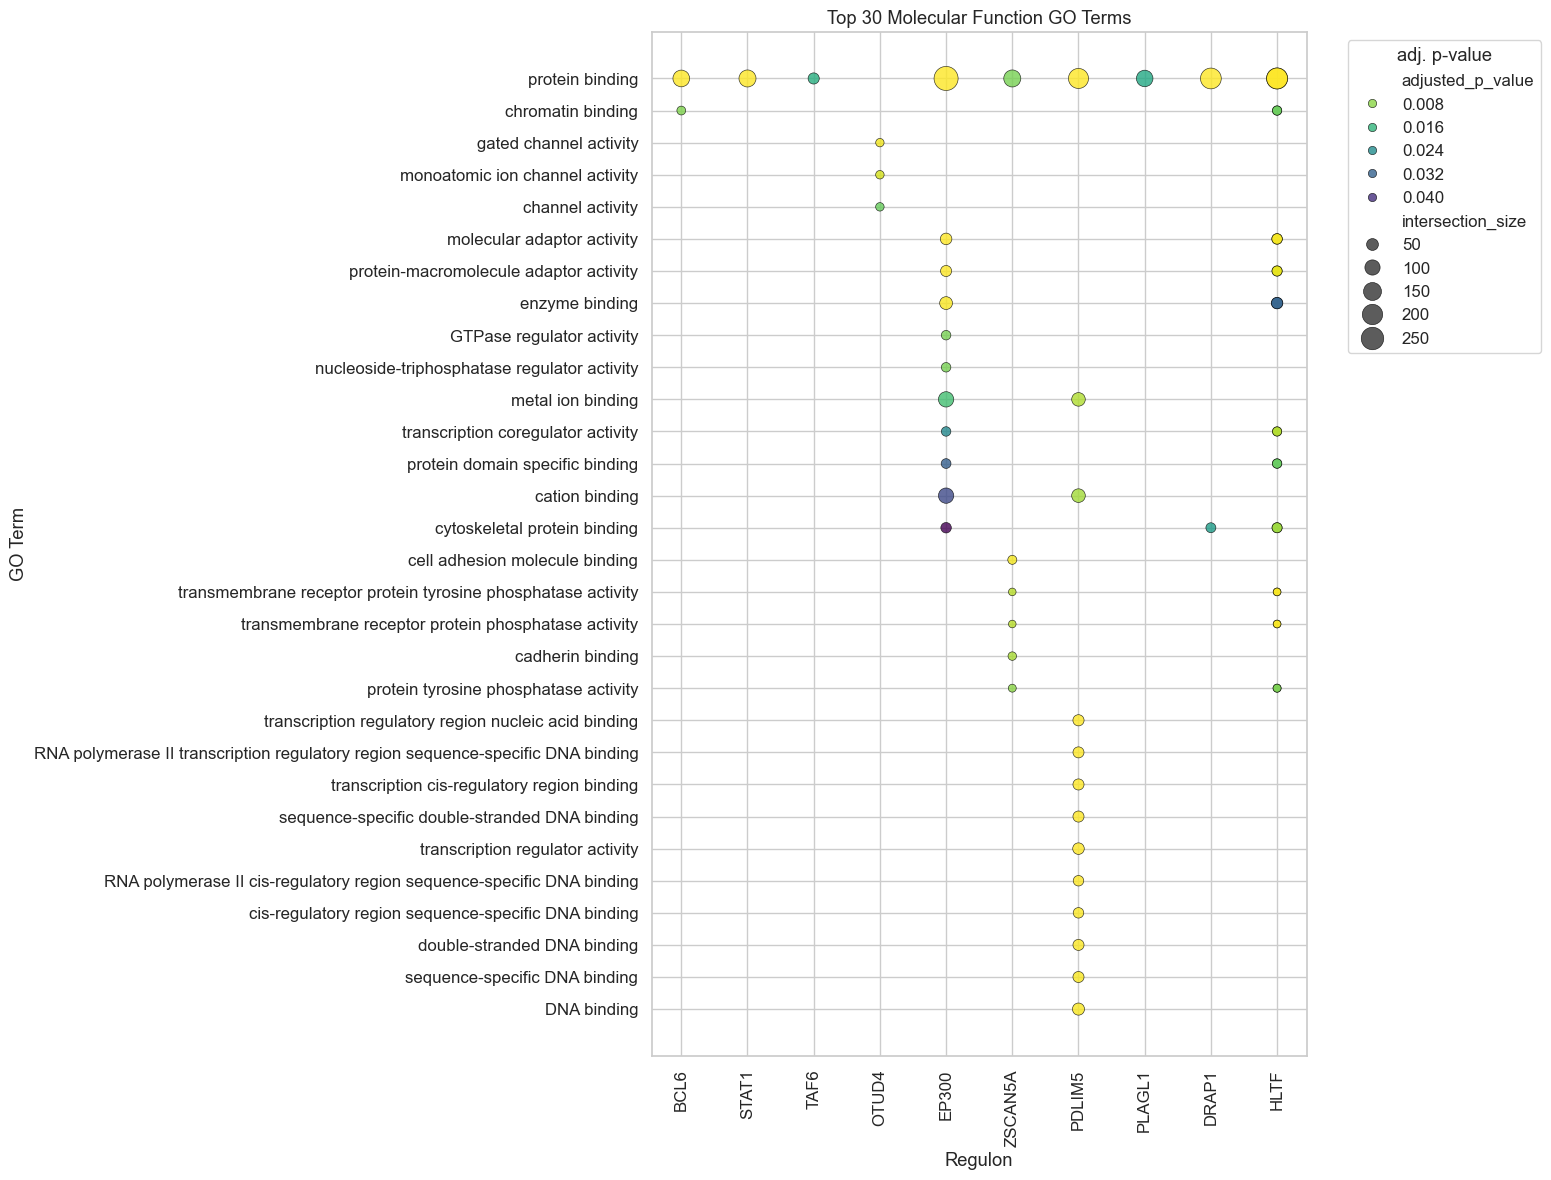

In [4]:
df_mf = df_filtered[df_filtered['source'] == 'Molecular Function']

plt.figure(figsize=(16, max(6, 0.4 * df_mf['term_name'].nunique())))
sns.scatterplot(
    data=df_mf,
    x="regulon",
    y="term_name",
    size="intersection_size",
    hue="adjusted_p_value",
    palette="viridis_r",
    sizes=(30, 300),
    edgecolor='black',
    alpha=0.8
)
plt.title("Top 30 Molecular Function GO Terms")
plt.xlabel("Regulon")
plt.ylabel("GO Term")
plt.xticks(rotation=90)
plt.legend(title="adj. p-value", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_Top30_GO-MF_terms.png", dpi=300, bbox_inches="tight")
plt.show()

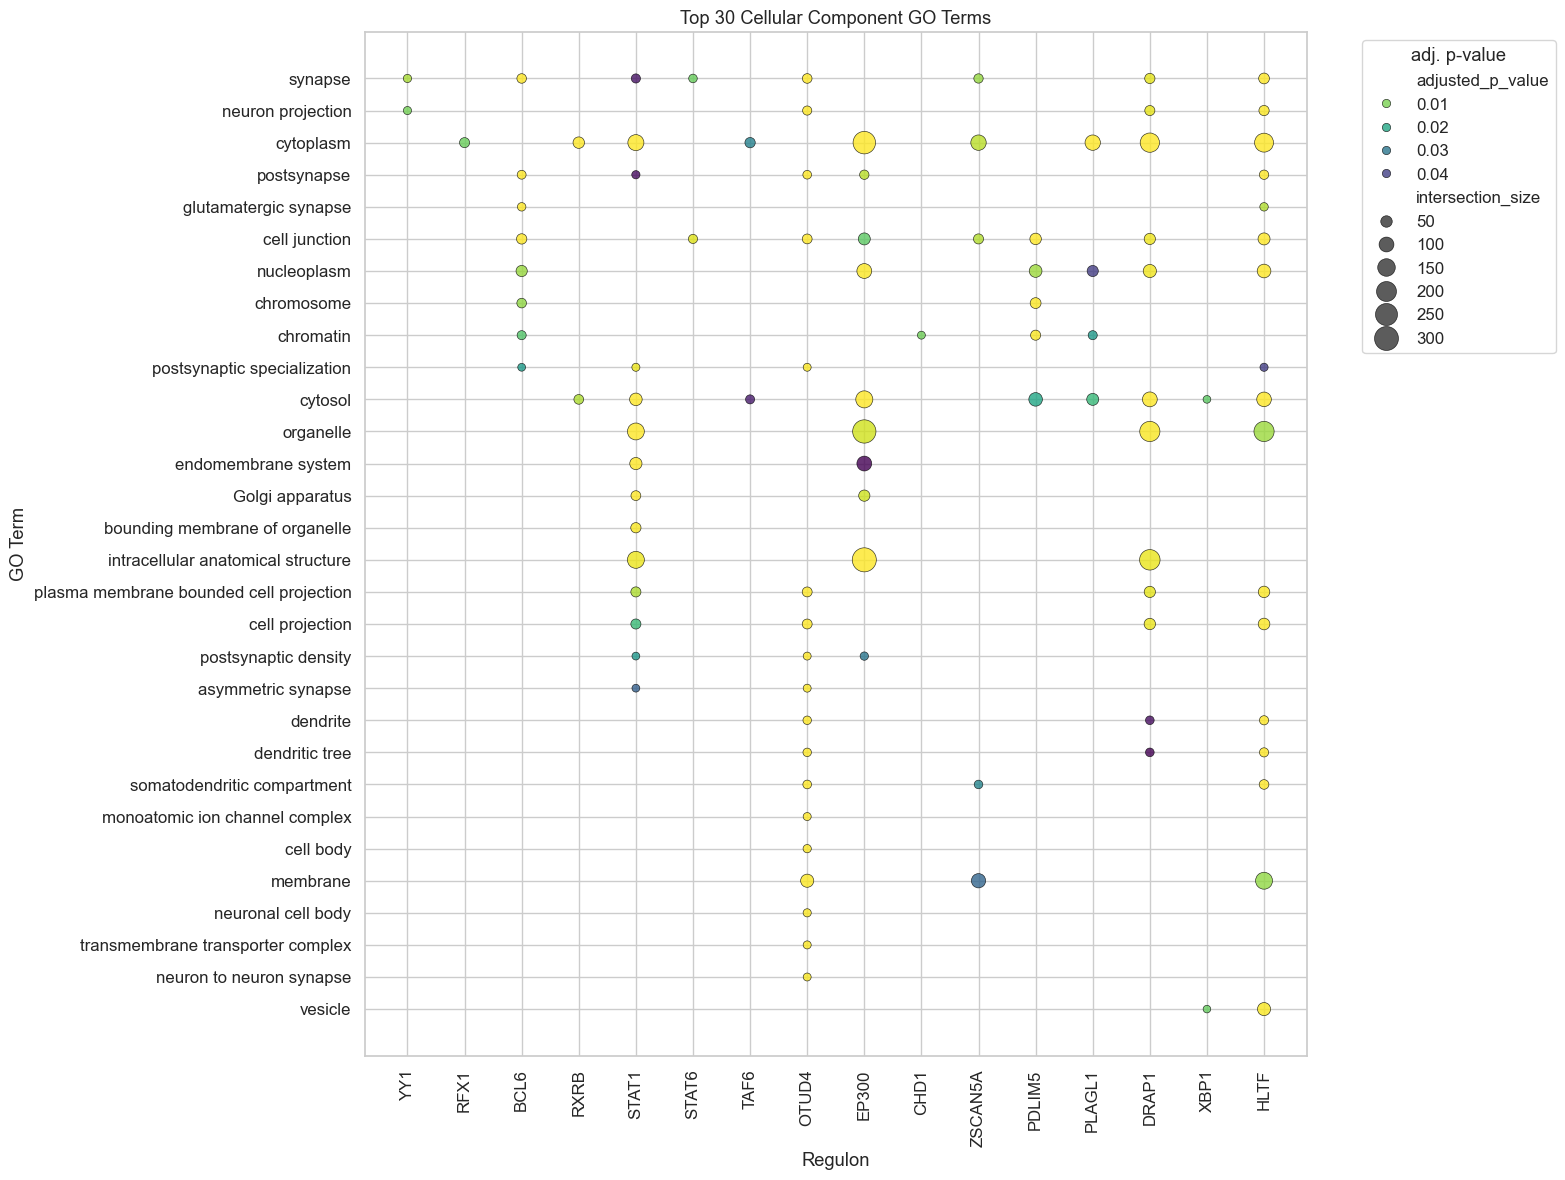

In [5]:
df_cc = df_filtered[df_filtered['source'] == 'Cellular Component']

plt.figure(figsize=(16, max(6, 0.4 * df_cc['term_name'].nunique())))
sns.scatterplot(
    data=df_cc,
    x="regulon",
    y="term_name",
    size="intersection_size",
    hue="adjusted_p_value",
    palette="viridis_r",
    sizes=(30, 300),
    edgecolor='black',
    alpha=0.8
)
plt.title("Top 30 Cellular Component GO Terms")
plt.xlabel("Regulon")
plt.ylabel("GO Term")
plt.xticks(rotation=90)
plt.legend(title="adj. p-value", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_Top30_GO-CC_terms.png", dpi=300, bbox_inches="tight")
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wide-format file
df = pd.read_csv("/Users/jakobmaeots/Internship/Data/NEN_I/NEN_I_rbp_regulon_target_genes_GO.tsv", sep="\t")

# Convert each column to a set of genes (drop NaNs first)
regulon_sets = {col: set(df[col].dropna()) for col in df.columns}

# Initialize data for pairwise comparison
overlap_data = []

regulons = list(regulon_sets.keys())

# Compute pairwise intersection sizes and percentages
for i, reg1 in enumerate(regulons):
    for j, reg2 in enumerate(regulons):
        genes1 = regulon_sets[reg1]
        genes2 = regulon_sets[reg2]
        intersection = genes1 & genes2
        intersection_size = len(intersection)
        percent_overlap = len(intersection) / len(genes1) if genes1 else 0
        overlap_data.append({
            "Regulon_X": reg1,
            "Regulon_Y": reg2,
            "IntersectionSize": intersection_size,
            "PercentOverlap": percent_overlap * 100  # for color
        })

# Convert to DataFrame
overlap_df = pd.DataFrame(overlap_data)

# Plot the dot plot
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid", font_scale=1.0)
dotplot = sns.scatterplot(
    data=overlap_df,
    x="Regulon_X",
    y="Regulon_Y",
    size="IntersectionSize",
    hue="PercentOverlap",
    sizes=(20, 300),
    palette="viridis",
    edgecolor="black",
    alpha=0.8
)

# Improve layout
plt.xticks(rotation=90)
plt.xlabel("Regulon")
plt.ylabel("Regulon")
plt.title("Pairwise Overlap of RBP Regulons")
plt.legend(title="Overlap %", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_regulon_overlap.png", dpi=300, bbox_inches="tight")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jakobmaeots/Internship/Data/NEN_I/NEN_I_rbp_regulon_target_genes_GO.tsv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

df = pd.read_csv("/Users/jakobmaeots/Internship/Data/NEN_I/NEN_I_rbp_regulons_with_targets.tsv", sep="\t")
sns.set(style="whitegrid", font_scale=1.2)

### ------------------ AUC Comparison ------------------ ###
# Compute per-regulon differences and perform Wilcoxon test across all
auc_stat, auc_p = wilcoxon(df["AUC_cluster_ASD"], df["AUC_cluster_CTRL"])

# Compute adjusted p-values per regulon (paired t-test for illustration here)
df["AUC_diff"] = df["AUC_cluster_ASD"] - df["AUC_cluster_CTRL"]
df["AUC_pval"] = df.apply(
    lambda row: wilcoxon([row["AUC_cluster_ASD"]], [row["AUC_cluster_CTRL"]])[1] if row["AUC_cluster_ASD"] != row["AUC_cluster_CTRL"] else 1.0,
    axis=1
)
df["AUC_padj"] = multipletests(df["AUC_pval"], method='fdr_bh')[1]
top_auc_regs = df.nsmallest(5, "AUC_padj")["regulon"]

# Melt for plotting
auc_data = df[["regulon", "AUC_cluster_ASD", "AUC_cluster_CTRL"]].melt(
    id_vars="regulon", var_name="Condition", value_name="AUC"
)
auc_data["Condition"] = auc_data["Condition"].map({
    "AUC_cluster_ASD": "ASD",
    "AUC_cluster_CTRL": "CTRL"
})

# Plot AUC
plt.figure(figsize=(9, 6))
for _, group in auc_data.groupby("regulon"):
    is_top = group["regulon"].iloc[0] in top_auc_regs.values
    color = 'red' if is_top else 'gray'
    plt.plot(group["Condition"], group["AUC"], marker='o', color=color, alpha=0.8)
    if is_top:
        plt.text("ASD", group.loc[group["Condition"] == "ASD", "AUC"].values[0], group["regulon"].iloc[0],
                 ha='left', va='center', fontsize=9)
        plt.text("CTRL", group.loc[group["Condition"] == "CTRL", "AUC"].values[0], group["regulon"].iloc[0],
                 ha='right', va='center', fontsize=9)

plt.title(f"AUC Comparison (Wilcoxon p = {auc_p:.2e})")
plt.ylabel("AUC Score")
plt.xlabel("Condition")
plt.tight_layout()
plt.show()

### ------------------ Rank Comparison ------------------ ###
# Compute per-regulon rank diffs and padj
rank_stat, rank_p = wilcoxon(df["Rank_cluster_ASD"], df["Rank_cluster_CTRL"])
df["Rank_diff"] = df["Rank_cluster_ASD"] - df["Rank_cluster_CTRL"]
df["Rank_pval"] = df.apply(
    lambda row: wilcoxon([row["Rank_cluster_ASD"]], [row["Rank_cluster_CTRL"]])[1] if row["Rank_cluster_ASD"] != row["Rank_cluster_CTRL"] else 1.0,
    axis=1
)
df["Rank_padj"] = multipletests(df["Rank_pval"], method='fdr_bh')[1]
top_rank_regs = df.nsmallest(5, "Rank_padj")["regulon"]

# Melt for plotting
rank_data = df[["regulon", "Rank_cluster_ASD", "Rank_cluster_CTRL"]].melt(
    id_vars="regulon", var_name="Condition", value_name="Rank"
)
rank_data["Condition"] = rank_data["Condition"].map({
    "Rank_cluster_ASD": "ASD",
    "Rank_cluster_CTRL": "CTRL"
})

# Plot Rank
plt.figure(figsize=(9, 6))
for _, group in rank_data.groupby("regulon"):
    is_top = group["regulon"].iloc[0] in top_rank_regs.values
    color = 'blue' if is_top else 'gray'
    plt.plot(group["Condition"], group["Rank"], marker='o', color=color, alpha=0.8)
    if is_top:
        plt.text("ASD", group.loc[group["Condition"] == "ASD", "Rank"].values[0], group["regulon"].iloc[0],
                 ha='left', va='center', fontsize=9)
        plt.text("CTRL", group.loc[group["Condition"] == "CTRL", "Rank"].values[0], group["regulon"].iloc[0],
                 ha='right', va='center', fontsize=9)

plt.gca().invert_yaxis()
plt.title(f"Rank Comparison (Wilcoxon p = {rank_p:.2e})")
plt.ylabel("Rank (Lower = More Specific)")
plt.xlabel("Condition")
plt.tight_layout()
plt.show()

In [ ]:
# Calculate per-regulon changes
df['AUC_diff'] = df['AUC_cluster_ASD'] - df['AUC_cluster_CTRL']
df['Rank_diff'] = df['Rank_cluster_CTRL'] - df['Rank_cluster_ASD']  # positive = higher in CTRL

# Wilcoxon test (paired samples)
stat_auc, p_auc = wilcoxon(df['AUC_cluster_ASD'], df['AUC_cluster_CTRL'])
stat_rank, p_rank = wilcoxon(df['Rank_cluster_ASD'], df['Rank_cluster_CTRL'])

# Add adjusted p-values
df['pval_auc'] = p_auc
df['pval_rank'] = p_rank

# (optional) Apply multiple testing correction if done per-regulon
# Example (not needed for global test):
# df['pval_auc_adj'] = multipletests(df['pval_auc'], method='fdr_bh')[1]

# Make summary table
summary_df = df[['regulon', 'AUC_cluster_ASD', 'AUC_cluster_CTRL', 'AUC_diff',
                 'Rank_cluster_ASD', 'Rank_cluster_CTRL', 'Rank_diff', 'pval_auc']].copy()

# Sort by strongest AUC differences
summary_df = summary_df.sort_values('AUC_diff', ascending=False)

# Display the table
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

import pandas as pd
from IPython.display import display
display(summary_df.reset_index(drop=True))

In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Your subset of interest
regulon_subset = [
    'BCL6', 'CHD1', 'DRAP1', 'EP300', 'HLTF', 'HMGA1', 'ILF2', 'NR2F1',
    'NR3C1', 'OTUD4', 'PDLIM5', 'PLAGL1', 'PRDM4', 'PURA', 'RFX1', 'SREBF2',
    'STAT1', 'STAT5B', 'STAT6', 'UBE2K', 'XBP1', 'YY1', 'ZBTB20', 'ZBTB44',
    'ZIC1', 'ZSCAN5A'
]

# Directory containing g:Profiler result files
input_dir = "/Users/jakobmaeots/Internship/Data/g-profiler/NEN_I"
csv_files = glob.glob(os.path.join(input_dir, "*.csv"))

# Collect data
all_data = []
for file_path in csv_files:
    try:
        df = pd.read_csv(file_path)
        regulon = os.path.splitext(os.path.basename(file_path))[0]
        if regulon in regulon_subset:
            df_subset = df[['term_name', 'source', 'adjusted_p_value', 'intersection_size']].copy()
            df_subset['regulon'] = regulon
            all_data.append(df_subset)
    except Exception as e:
        print(f"Skipping {file_path}: {e}")

# Combine into single dataframe
df_combined = pd.concat(all_data, ignore_index=True)

# Filter to only GO terms
df_go = df_combined[df_combined['source'].isin(['GO:MF', 'GO:BP', 'GO:CC'])]

# Get top 30 unique GO terms by significance
top_terms = (
    df_go.sort_values("adjusted_p_value")
         .drop_duplicates("term_name")
         .head(30)["term_name"]
)

# Filter for top 30 terms across subset
df_filtered = df_go[df_go["term_name"].isin(top_terms)]

# Plot
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.2)
sns.scatterplot(
    data=df_filtered,
    x="regulon",
    y="term_name",
    size="intersection_size",
    hue="adjusted_p_value",
    palette="viridis_r",
    sizes=(50, 300),
    edgecolor='black',
    alpha=0.8
)

plt.xticks(rotation=90)
plt.xlabel("Regulon")
plt.ylabel("GO Term")
plt.title("Top 30 GO Terms for Selected Regulons")
plt.legend(title="adj. p-value", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_Top30_GOterms_significant.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Your subset of interest
regulon_subset = [
    'BCL6', 'CHD1', 'DRAP1', 'EP300', 'HLTF', 'HMGA1', 'ILF2', 'NR2F1',
    'NR3C1', 'OTUD4', 'PDLIM5', 'PLAGL1', 'PRDM4', 'PURA', 'RFX1', 'SREBF2',
    'STAT1', 'STAT5B', 'STAT6', 'UBE2K', 'XBP1', 'YY1', 'ZBTB20', 'ZBTB44',
    'ZIC1', 'ZSCAN5A'
]

# Directory with gProfiler result files
input_dir = "/Users/jakobmaeots/Internship/Data/g-profiler/NEN_I"
csv_files = glob.glob(os.path.join(input_dir, "*.csv"))

# Collect data
all_data = []
for file_path in csv_files:
    try:
        df = pd.read_csv(file_path)
        regulon = os.path.splitext(os.path.basename(file_path))[0]
        if regulon in regulon_subset:
            df_subset = df[['term_name', 'source', 'adjusted_p_value', 'intersection_size']].copy()
            df_subset['regulon'] = regulon
            all_data.append(df_subset)
    except Exception as e:
        print(f"Skipping {file_path}: {e}")

# Combine data
df_combined = pd.concat(all_data, ignore_index=True)

# Filter to GO categories
df_go = df_combined[df_combined['source'].isin(['GO:MF', 'GO:BP', 'GO:CC'])]

# Top 30 unique GO terms by p-value
top_terms = (
    df_go.sort_values("adjusted_p_value")
         .drop_duplicates("term_name")
         .head(30)["term_name"]
)

# Keep only top terms
df_filtered = df_go[df_go["term_name"].isin(top_terms)].copy()

# Create an ordered y-axis: prepend GO source to term name to distinguish similar names
df_filtered["GO_term"] = df_filtered["source"] + ": " + df_filtered["term_name"]
term_order = (
    df_filtered[["GO_term", "adjusted_p_value"]]
    .groupby("GO_term")["adjusted_p_value"]
    .min()
    .sort_values()
    .index.tolist()
)

# Set up plot
plt.figure(figsize=(22, max(6, 0.35 * len(term_order))))
sns.set(font_scale=1.2)

# Normalize color scale (log scale gives better visual separation)
norm = mcolors.LogNorm(vmin=df_filtered['adjusted_p_value'].min(), vmax=1)

scatter = sns.scatterplot(
    data=df_filtered,
    x="regulon",
    y="GO_term",
    size="intersection_size",
    hue="adjusted_p_value",
    palette="viridis_r",
    sizes=(50, 300),
    edgecolor='black',
    alpha=0.85,
    hue_norm=norm,
)

# Fix axis and labels
scatter.set_yticks(range(len(term_order)))
scatter.set_yticklabels(term_order)
plt.xticks(rotation=90)
plt.xlabel("Regulon")
plt.ylabel("GO Term")
plt.title("Top 30 Significant GO Terms Across Regulons")

# Colorbar
norm = mcolors.LogNorm(vmin=df_filtered['adjusted_p_value'].min(), vmax=1)
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm.set_array([])  # Required for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=plt.gca(), fraction=0.02, pad=0.02)
cbar.set_label("adj. p-value (log scale)")

# Size legend (intersection size)
handles, labels = scatter.get_legend_handles_labels()
size_legend = [h for h, l in zip(handles, labels) if l.isdigit()]
size_labels = [l for l in labels if l.isdigit()]
plt.legend(size_legend, size_labels, title="Intersection Size",
           bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

plt.tight_layout()
#plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_Top30_GOterms_subset_unified.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.colors as mcolors

# Cap the adjusted p-value range:
vmin = 1e-4  # Anything below is "very significant"
vmax = 0.1   # Anything above is "not significant"

# Clamp values to this range
df_filtered['adj_p_clamped'] = df_filtered['adjusted_p_value'].clip(lower=vmin, upper=vmax)

# Use log scale normalization
norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)

# Plot
plt.figure(figsize=(22, max(6, 0.35 * len(term_order))))
sns.set(font_scale=1.2)

scatter = sns.scatterplot(
    data=df_filtered,
    x="regulon",
    y="GO_term",
    size="intersection_size",
    hue="adj_p_clamped",
    palette="viridis_r",
    sizes=(50, 300),
    edgecolor='black',
    alpha=0.85,
    hue_norm=norm,
)

# Colorbar for adjusted p-values
sm = plt.cm.ScalarMappable(norm=norm, cmap="viridis_r")
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), fraction=0.02, pad=0.02)
cbar.set_label("adj. p-value")
cbar.set_ticks([1e-4, 1e-3, 1e-2, 1e-1])
cbar.set_ticklabels(["≤0.0001", "0.001", "0.01", "0.1"])

# Size legend (intersection size)
handles, labels = scatter.get_legend_handles_labels()
size_legend = [h for h, l in zip(handles, labels) if l.isdigit()]
size_labels = [l for l in labels if l.isdigit()]
plt.legend(size_legend, size_labels, title="Intersection Size",
           bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

plt.xticks(rotation=90)
plt.xlabel("Regulon")
plt.ylabel("GO Term")
plt.title("Top 30 Significant GO Terms Across Regulons")

plt.tight_layout()
#plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_Top30_GOterms_RBPs.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Your subset of interest
regulon_subset2 = [
    'NR2F1', 'NR3C1', 'PURA', 'SREBF2', 'UBE2K', 'ZBTB44'
]

# Directory containing g:Profiler result files
input_dir = "/Users/jakobmaeots/Internship/Data/g-profiler/NEN_I"
csv_files = glob.glob(os.path.join(input_dir, "*.csv"))

# Collect data
all_data = []
for file_path in csv_files:
    try:
        df = pd.read_csv(file_path)
        regulon = os.path.splitext(os.path.basename(file_path))[0]
        if regulon in regulon_subset2:
            df_subset = df[['term_name', 'source', 'adjusted_p_value', 'intersection_size']].copy()
            df_subset['regulon'] = regulon
            all_data.append(df_subset)
    except Exception as e:
        print(f"Skipping {file_path}: {e}")

# Combine into single dataframe
df_combined = pd.concat(all_data, ignore_index=True)

# Filter to only GO terms
df_go = df_combined[df_combined['source'].isin(['GO:MF', 'GO:BP', 'GO:CC'])]

# Get top 30 unique GO terms by significance
top_terms = (
    df_go.sort_values("adjusted_p_value")
         .drop_duplicates("term_name")
         .head(30)["term_name"]
)

# Filter for top 30 terms across subset
df_filtered = df_go[df_go["term_name"].isin(top_terms)]

# Plot
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.2)
sns.scatterplot(
    data=df_filtered,
    x="regulon",
    y="term_name",
    size="intersection_size",
    hue="adjusted_p_value",
    palette="viridis_r",
    sizes=(50, 300),
    edgecolor='black',
    alpha=0.8
)

plt.xticks(rotation=90)
plt.xlabel("Regulon")
plt.ylabel("GO Term")
plt.title("Top 30 GO Terms for Selected Regulons")
plt.legend(title="adj. p-value", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_Top30_GOterms_significant.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Your subset of interest
regulon_subset2 = [
    'NR2F1', 'NR3C1', 'PURA', 'SREBF2', 'UBE2K', 'ZBTB44'
]

# Directory with gProfiler result files
input_dir = "/Users/jakobmaeots/Internship/Data/g-profiler/NEN_I"
csv_files = glob.glob(os.path.join(input_dir, "*.csv"))

# Collect data
all_data = []
for file_path in csv_files:
    try:
        df = pd.read_csv(file_path)
        regulon = os.path.splitext(os.path.basename(file_path))[0]
        if regulon in regulon_subset2:
            df_subset = df[['term_name', 'source', 'adjusted_p_value', 'intersection_size']].copy()
            df_subset['regulon'] = regulon
            all_data.append(df_subset)
    except Exception as e:
        print(f"Skipping {file_path}: {e}")

# Combine data
df_combined = pd.concat(all_data, ignore_index=True)

# Filter to GO categories
df_go = df_combined[df_combined['source'].isin(['GO:MF', 'GO:BP', 'GO:CC'])]

# Top 30 unique GO terms by p-value
top_terms = (
    df_go.sort_values("adjusted_p_value")
         .drop_duplicates("term_name")
         .head(30)["term_name"]
)

# Keep only top terms
df_filtered = df_go[df_go["term_name"].isin(top_terms)].copy()

# Create an ordered y-axis: prepend GO source to term name to distinguish similar names
df_filtered["GO_term"] = df_filtered["source"] + ": " + df_filtered["term_name"]
term_order = (
    df_filtered[["GO_term", "adjusted_p_value"]]
    .groupby("GO_term")["adjusted_p_value"]
    .min()
    .sort_values()
    .index.tolist()
)

# Set up plot
plt.figure(figsize=(22, max(6, 0.35 * len(term_order))))
sns.set(font_scale=1.2)

# Normalize color scale (log scale gives better visual separation)
norm = mcolors.LogNorm(vmin=df_filtered['adjusted_p_value'].min(), vmax=1)

scatter = sns.scatterplot(
    data=df_filtered,
    x="regulon",
    y="GO_term",
    size="intersection_size",
    hue="adjusted_p_value",
    palette="viridis_r",
    sizes=(50, 300),
    edgecolor='black',
    alpha=0.85,
    hue_norm=norm,
)

# Fix axis and labels
scatter.set_yticks(range(len(term_order)))
scatter.set_yticklabels(term_order)
plt.xticks(rotation=90)
plt.xlabel("Regulon")
plt.ylabel("GO Term")
plt.title("Top 30 Significant GO Terms Across Regulons")

# Colorbar
norm = mcolors.LogNorm(vmin=df_filtered['adjusted_p_value'].min(), vmax=1)
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm.set_array([])  # Required for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=plt.gca(), fraction=0.02, pad=0.02)
cbar.set_label("adj. p-value (log scale)")

# Size legend (intersection size)
handles, labels = scatter.get_legend_handles_labels()
size_legend = [h for h, l in zip(handles, labels) if l.isdigit()]
size_labels = [l for l in labels if l.isdigit()]
plt.legend(size_legend, size_labels, title="Intersection Size",
           bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

plt.tight_layout()
#plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_Top30_GOterms_subset_unified.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.colors as mcolors

# Cap the adjusted p-value range:
vmin = 1e-4  # Anything below is "very significant"
vmax = 0.1   # Anything above is "not significant"

# Clamp values to this range
df_filtered['adj_p_clamped'] = df_filtered['adjusted_p_value'].clip(lower=vmin, upper=vmax)

# Use log scale normalization
norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)

# Plot
plt.figure(figsize=(22, max(6, 0.35 * len(term_order))))
sns.set(font_scale=1.7)

scatter = sns.scatterplot(
    data=df_filtered,
    x="regulon",
    y="GO_term",
    size="intersection_size",
    hue="adj_p_clamped",
    palette="viridis_r",
    sizes=(50, 300),
    edgecolor='black',
    alpha=0.85,
    hue_norm=norm,
)

# Colorbar for adjusted p-values
sm = plt.cm.ScalarMappable(norm=norm, cmap="viridis_r")
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), fraction=0.02, pad=0.02)
cbar.set_label("adj. p-value")
cbar.set_ticks([1e-4, 1e-3, 1e-2, 1e-1])
cbar.set_ticklabels(["≤0.0001", "0.001", "0.01", "0.1"])

# Size legend (intersection size)
handles, labels = scatter.get_legend_handles_labels()
size_legend = [h for h, l in zip(handles, labels) if l.isdigit()]
size_labels = [l for l in labels if l.isdigit()]
plt.legend(size_legend, size_labels, title="Intersection Size",
           bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

plt.xticks(rotation=90)
plt.xlabel("Regulon")
plt.ylabel("GO Term")
plt.title("Top 30 Significant GO Terms Across Regulons")

plt.tight_layout()
#plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_Top30_GOterms_module2.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

# Clamp adjusted p-values
vmin = 1e-4
vmax = 0.1
df_filtered['adj_p_clamped'] = df_filtered['adjusted_p_value'].clip(lower=vmin, upper=vmax)
norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)

# Create figure and main axis
fig, ax = plt.subplots(figsize=(22, max(6, 0.35 * len(df_filtered['GO_term'].unique()))))
sns.set(font_scale=1.7)

# Main scatterplot
scatter = sns.scatterplot(
    data=df_filtered,
    x="regulon",
    y="GO_term",
    size="intersection_size",
    hue="adj_p_clamped",
    palette="viridis_r",
    sizes=(50, 300),
    edgecolor='black',
    alpha=0.9,
    hue_norm=norm,
    ax=ax
)

# Add intersection size legend (manually placed)
handles, labels = scatter.get_legend_handles_labels()
size_handles = [h for h, l in zip(handles, labels) if l.isdigit()]
size_labels = [l for l in labels if l.isdigit()]
legend1 = ax.legend(size_handles, size_labels, title="Intersection",
                    loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
ax.add_artist(legend1)

# Add colorbar (right below the size legend)
sm = plt.cm.ScalarMappable(norm=norm, cmap="viridis_r")
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.04, pad=0.04, location="right", shrink=0.4)
cbar.set_label("adj. p-value")
cbar.set_ticks([1e-4, 1e-3, 1e-2, 1e-1])
cbar.set_ticklabels(["≤0.0001", "0.001", "0.01", "0.1"])

# Aesthetics
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Regulon")
ax.set_ylabel("GO Term")
ax.set_title("Top 30 Significant GO Terms Across Regulons")

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

# Desired regulon order
desired_order = ['NR3C1', 'SREBF2', 'NR2F1', 'ZBTB44', 'PURA', 'UBE2K']
df_filtered['regulon'] = pd.Categorical(df_filtered['regulon'], categories=desired_order, ordered=True)
df_filtered = df_filtered.sort_values("regulon")

# Clamp adjusted p-values
vmin = 1e-4
vmax = 0.1
df_filtered['adj_p_clamped'] = df_filtered['adjusted_p_value'].clip(lower=vmin, upper=vmax)
norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)

# Create figure and main axis
fig, ax = plt.subplots(figsize=(22, max(6, 0.35 * len(df_filtered['GO_term'].unique()))))
sns.set(font_scale=1.7)

# Main scatterplot
scatter = sns.scatterplot(
    data=df_filtered,
    x="regulon",
    y="GO_term",
    size="intersection_size",
    hue="adj_p_clamped",
    palette="viridis_r",
    sizes=(50, 300),
    edgecolor='black',
    alpha=0.9,
    hue_norm=norm,
    ax=ax
)

# Add intersection size legend (top right)
handles, labels = scatter.get_legend_handles_labels()
size_handles = [h for h, l in zip(handles, labels) if l.isdigit()]
size_labels = [l for l in labels if l.isdigit()]
legend1 = ax.legend(size_handles, size_labels, title="Intersection",
                    loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
ax.add_artist(legend1)

# Add colorbar below the legend
sm = plt.cm.ScalarMappable(norm=norm, cmap="viridis_r")
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.04, pad=0.05, location="right", shrink=0.4)
cbar.set_label("adj. p-value")
cbar.set_ticks([1e-4, 1e-3, 1e-2, 1e-1])
cbar.set_ticklabels(["≤0.0001", "0.001", "0.01", "0.1"])

# Aesthetics
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Regulon")
ax.set_ylabel("GO Term")
ax.set_title("Top 30 Significant GO Terms Across Regulons")

plt.tight_layout()
plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_Top30_GOterms_module2.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

# Define regulon order from the screenshot
regulon_order = [
    'ILF2', 'DRAP1', 'XBP1', 'HMGA1', 'STAT6', 'STAT5B', 'ZIC1', 'OTUD4',
    'HLTF', 'CHD1', 'PLAGL1', 'BCL6', 'ZSCAN5A', 'EP300', 'PDLIM5', 'ZBTB20',
    'PRDM4', 'STAT1', 'NR3C1', 'SREBF2', 'NR2F1', 'ZBTB44', 'PURA', 'UBE2K',
    'RFX1', 'YY1'
]

# Clean and align regulon names in your dataframe
df_filtered['regulon_clean'] = df_filtered['regulon'].str.replace(r'[\(\)\+]', '', regex=True).str.upper()
df_filtered['regulon_clean'] = pd.Categorical(df_filtered['regulon_clean'], categories=regulon_order, ordered=True)
df_filtered = df_filtered.sort_values('regulon_clean')

# Cap and normalize p-values
vmin, vmax = 1e-4, 0.1
df_filtered['adj_p_clamped'] = df_filtered['adjusted_p_value'].clip(lower=vmin, upper=vmax)
norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)

# Plot
plt.figure(figsize=(22, max(6, 0.35 * len(df_filtered['GO_term'].unique()))))
sns.set(font_scale=1.7)

scatter = sns.scatterplot(
    data=df_filtered,
    x="regulon_clean",
    y="GO_term",
    size="intersection_size",
    hue="adj_p_clamped",
    palette="viridis_r",
    sizes=(50, 300),
    edgecolor='black',
    alpha=0.85,
    hue_norm=norm,
)

# Colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap="viridis_r")
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), fraction=0.02, pad=0.02)
cbar.set_label("adj. p-value")
cbar.set_ticks([1e-4, 1e-3, 1e-2, 1e-1])
cbar.set_ticklabels(["≤0.0001", "0.001", "0.01", "0.1"])

# Size legend
handles, labels = scatter.get_legend_handles_labels()
size_legend = [h for h, l in zip(handles, labels) if l.isdigit()]
size_labels = [l for l in labels if l.isdigit()]
plt.legend(size_legend, size_labels, title="Intersection Size",
           bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

plt.xticks(rotation=90)
plt.xlabel("Regulon")
plt.ylabel("GO Term")
plt.title("Top 30 Significant GO Terms Across Regulons")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Your subset of interest
regulon_order = [
     'NR3C1', 'SREBF2', 'NR2F1', 'ZBTB44', 'PURA', 'UBE2K'
]

# Directory containing g:Profiler result files
input_dir = "/Users/jakobmaeots/Internship/Data/g-profiler/NEN_I"
csv_files = glob.glob(os.path.join(input_dir, "*.csv"))

# Collect data
all_data = []
for file_path in csv_files:
    try:
        df = pd.read_csv(file_path)
        regulon = os.path.splitext(os.path.basename(file_path))[0]
        if regulon in regulon_order:
            df_subset = df[['term_name', 'source', 'adjusted_p_value', 'intersection_size']].copy()
            df_subset['regulon'] = regulon
            all_data.append(df_subset)
    except Exception as e:
        print(f"Skipping {file_path}: {e}")

# Combine into single dataframe
df_combined = pd.concat(all_data, ignore_index=True)

# Filter to only GO terms
df_go = df_combined[df_combined['source'].isin(['GO:MF', 'GO:BP', 'GO:CC'])]

# Prepend GO source to term name
df_go["GO_term_full"] = df_go["source"] + ": " + df_go["term_name"]

# Count recurrence across regulons
term_recurrence = df_go.groupby("GO_term_full")["regulon"].nunique().sort_values(ascending=False)

# Top 30 most recurring GO terms
top_terms = term_recurrence.head(30).index

# Filter again
df_filtered = df_go[df_go["GO_term_full"].isin(top_terms)].copy()

# Ordered y-axis: GO terms
df_filtered["GO_term"] = pd.Categorical(
    df_filtered["GO_term_full"],
    categories=top_terms,
    ordered=True
)

# Ordered x-axis: Regulons
df_filtered["regulon"] = pd.Categorical(
    df_filtered["regulon"],
    categories=regulon_order,
    ordered=True
)

# Clamp adjusted p-values for log scaling
vmin = 1e-4
vmax = 0.1
df_filtered["adj_p_clamped"] = df_filtered["adjusted_p_value"].clip(lower=vmin, upper=vmax)
norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)

# Plot
plt.figure(figsize=(22, max(6, 0.35 * len(top_terms))))
sns.set(font_scale=1.7)
scatter = sns.scatterplot(
    data=df_filtered,
    x="regulon",
    y="GO_term",
    size="intersection_size",
    hue="adj_p_clamped",
    palette="viridis_r",
    sizes=(50, 300),
    edgecolor='black',
    alpha=0.85,
    hue_norm=norm
)

# Add colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap="viridis_r")
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), fraction=0.025, pad=0.01)
cbar.set_label("adj. p-value")
cbar.set_ticks([1e-4, 1e-3, 1e-2, 1e-1])
cbar.set_ticklabels(["≤0.0001", "0.001", "0.01", "0.1"])

# Add intersection size legend
handles, labels = scatter.get_legend_handles_labels()
size_handles = [h for h, l in zip(handles, labels) if l.isdigit()]
size_labels = [l for l in labels if l.isdigit()]
plt.legend(size_handles, size_labels, title="Intersection",
           bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

# Labels
plt.xticks(rotation=90)
plt.xlabel("Regulon")
plt.ylabel("GO Term")
plt.title("Top 30 Most Shared GO Terms Across Selected Regulons")

plt.tight_layout()
plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_Top30_GOterms_rankedby_recurring.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

# --- Filter and prepare data ---
df_bp = df_filtered[df_filtered['source'] == 'GO:BP'].copy()

# Top 20 GO:BP terms by lowest adjusted p-value
top_terms = df_bp.sort_values("adjusted_p_value")["term_name"].drop_duplicates().head(30)
df_bp = df_bp[df_bp["term_name"].isin(top_terms)]

# Clean and order regulon names
df_bp['regulon_clean'] = df_bp['regulon'].str.replace(r'[\(\)\+]', '', regex=True).str.upper()
df_bp['regulon_clean'] = pd.Categorical(df_bp['regulon_clean'], categories=regulon_order, ordered=True)
df_bp = df_bp.sort_values('regulon_clean')

# P-value normalization
pvals = df_bp['adjusted_p_value']
norm = mcolors.LogNorm(vmin=pvals.min(), vmax=pvals.max())
df_bp['adj_p_clamped'] = pvals

# --- Main Plot ---
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(12, max(4, 0.28 * df_bp['term_name'].nunique())))  # narrower width

scatter = sns.scatterplot(
    data=df_bp,
    x="regulon_clean",
    y="term_name",
    size="intersection_size",
    hue="adj_p_clamped",
    palette="viridis_r",
    sizes=(40, 250),
    edgecolor='black',
    alpha=0.85,
    hue_norm=norm,
    ax=ax
)

# Remove legend from plot
scatter.legend_.remove()

# Colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap="viridis_r")
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", shrink=0.8, pad=0.5)
cbar.set_label("Adjusted p-value (log scale)")

# Axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Regulon")
ax.set_ylabel("GO Term")

plt.tight_layout()
plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_GO_BP_dotplot_main.png", dpi=300, bbox_inches="tight")
plt.show()

# --- Separate legend ---
fig_legend, ax_legend = plt.subplots(figsize=(3, 2))
handles, labels = scatter.get_legend_handles_labels()
size_handles = [h for h, l in zip(handles, labels) if l.isdigit()]
size_labels = [l for l in labels if l.isdigit()]
legend = ax_legend.legend(size_handles, size_labels, title="Intersection Size", loc='center')
ax_legend.axis('off')

fig_legend.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_GO_BP_legend_only.png", dpi=300, bbox_inches="tight")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

# --- Use ALL GO terms ---
df_all = df_filtered.copy()

# Clean and order regulon names
df_all['regulon_clean'] = df_all['regulon'].str.replace(r'[\(\)\+]', '', regex=True).str.upper()
df_all['regulon_clean'] = pd.Categorical(df_all['regulon_clean'], categories=regulon_order, ordered=True)
df_all = df_all.sort_values('regulon_clean')

# P-value normalization
pvals = df_all['adjusted_p_value']
norm = mcolors.LogNorm(vmin=pvals.min(), vmax=pvals.max())
df_all['adj_p_clamped'] = pvals

# --- Main Plot ---
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(12, max(6, 0.3 * df_all['term_name'].nunique())))  # Dynamically scale height

scatter = sns.scatterplot(
    data=df_all,
    x="regulon_clean",
    y="term_name",
    size="intersection_size",
    hue="adj_p_clamped",
    palette="viridis_r",
    sizes=(40, 250),
    edgecolor='black',
    alpha=0.85,
    hue_norm=norm,
    ax=ax
)

# Remove legend from main plot
scatter.legend_.remove()

# Colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap="viridis_r")
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", shrink=0.8, pad=0.5)
cbar.set_label("Adjusted p-value (log scale)")

# Axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Regulon")
ax.set_ylabel("GO Term")

plt.tight_layout()
plt.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_GO_ALL_dotplot_main.png", dpi=300, bbox_inches="tight")
plt.show()

# --- Export separate size legend ---
fig_legend, ax_legend = plt.subplots(figsize=(3, 2))
handles, labels = scatter.get_legend_handles_labels()
size_handles = [h for h, l in zip(handles, labels) if l.isdigit()]
size_labels = [l for l in labels if l.isdigit()]
legend = ax_legend.legend(size_handles, size_labels, title="Intersection Size", loc='center')
ax_legend.axis('off')

fig_legend.savefig("/Users/jakobmaeots/Internship/Results/NEN_I/NEN_I_GO_ALL_legend_only.png", dpi=300, bbox_inches="tight")